# Ford GoBike System Data
## by Ahmed Yasser Mostafa

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Reading dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer


In [3]:
df.shape

(519700, 13)

### What is the structure of your dataset?

> The data consists of 519700 rows and 13 columns

### What is/are the main feature(s) of interest in your dataset?

> Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User Type, Start & end times and start & end stations' geolocations

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> First, let's investigate the duration of the rides

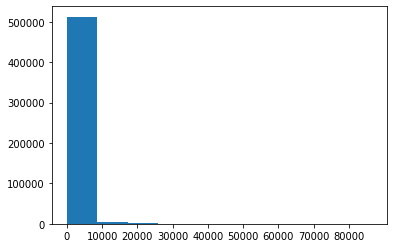

In [4]:
# Plotting histogram of the duration (in seconds)
# Changing the ticks on the x-axis to be able to see the distribution better
plt.hist(data = df, x = 'duration_sec');
xticks = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
plt.xticks(xticks, xticks);

> So most of the rides take less than 10,000 seconds, mainly in the 0 till about 8000 region

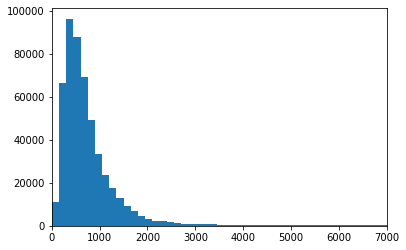

In [5]:
# Change binsize to 150 to see the groupings of duration better
bins = np.arange(0, df.duration_sec.max() + 150, 150)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim([0, 7000]); # Duration data is motly located till about 8000 seconds hence scaling down the x-axis

> So our data is definitely right-skewed. Most of the rides reach about 900 seconds and then others take gradully less.

> But we would still like to interpret the data in a unit other than seconds. So I will make 2 columns; one for duration in minutes (integer) and one for duration in hours (float)

In [6]:
df['duration_min'] = df['duration_sec'] / 60 # Define new column that includes ride duration in minutes (1 minute = 60 seconds)
df['duration_hour'] = df['duration_min'] / 60 #Define new column that includes ride duration in hours (1 hour = 60 minutes)
df = df.round({'duration_hour': 2, 'duration_min': 0}) # Allow duration (in hours) to have 2 decimal places and duration (in minutes) to have no decimal places
df.duration_min = df.duration_min.astype(int) # Convert ride duration in minutes columns to integer type 

In [7]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hour
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,22.25
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,21.89
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,763,12.71


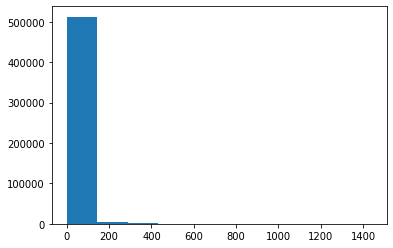

In [8]:
plt.hist(data = df, x = 'duration_min');

> Now we can see that most rides take up to about 170 minutes

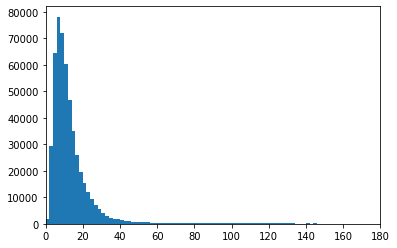

In [63]:
# Change binsize to 2 to see the groupings of duration better
bins = np.arange(0, df.duration_min.max() + 2, 2)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xlim([0, 180]); # Duration data is motly located till about 180 minutes hence scaling down the x-axis

In [47]:
# Checking the statistics for the duration (in minutes) after logarithmic transformation
np.log10(df.duration_min.describe())

count    5.713842
mean     1.181140
std      1.392173
min      0.000000
25%      0.778151
50%      1.000000
75%      1.204120
max      2.556303
Name: duration_min, dtype: float64

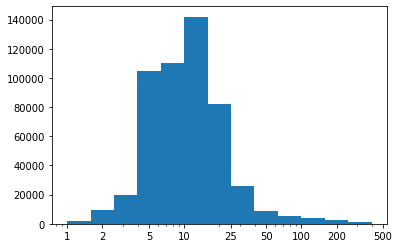

In [62]:
# Changing the x-axis scale to a logarithmic one
bins = 10 ** np.arange(0, 2.56 + 0.2, 0.2) # min: 0, max: 2.56, binsize = 0.2
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 25, 50, 100, 200, 500], [1, 2, 5, 10, 25, 50, 100, 200, 500]); # Changing the default powers of 10 ticks to more readable ticks

> Now the plot is much better to interpret as we can see that most of the rides occupy from 1 to 60 minutes

> Finally, I want to check for outliers and the rides that take too much time

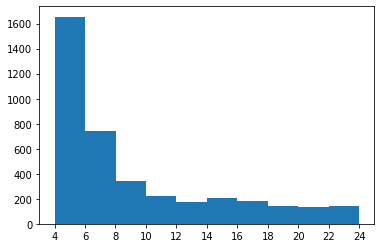

In [10]:
temp = df[df['duration_hour'] > 4] # Defining dataframe that contains all ride durations (in hours) more than 4 hours
bins = np.arange(temp.duration_hour.min(), temp.duration_hour.max()+1, 1) # Change binsize to 1 to better see distribution
plt.hist(data = temp, x = 'duration_hour');
xticks = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24] # Adding more ticks on x-axis
plt.xticks(xticks, xticks);

In [11]:
df[df['duration_hour'] > 6] # Checking all rides with duration (in hours) more than 6 hours

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hour
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,22.25
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,21.89
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,763,12.71
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,17.27
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,727,12.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517763,62356,2017-06-29 16:29:47.9920,2017-06-30 09:49:04.8180,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,22,Howard St at Beale St,37.789756,-122.394643,255,Subscriber,1039,17.32
518086,25453,2017-06-29 13:26:20.8700,2017-06-29 20:30:34.8050,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,278,Customer,424,7.07
518507,31303,2017-06-29 07:19:09.8220,2017-06-29 16:00:53.0040,24,Spear St at Folsom St,37.789677,-122.390428,24,Spear St at Folsom St,37.789677,-122.390428,1040,Subscriber,522,8.70
518582,70584,2017-06-28 18:21:27.2290,2017-06-29 13:57:51.6200,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,599,Customer,1176,19.61


In [12]:
(df[df['duration_hour'] > 6].shape[0] / df.shape[0]) * 100 # Checking percentage of rows that contain ride durations greater than 6 hours

0.4389070617664037

> There seems to be a small number of rides that take more than 6 hours which is unusual. After a quick investigation, the latitude and longitudes of the start and stations seem also to be near each other. A possible explanation is that the users paid a lot to keep the bikes for these long whiles. 

> Since these rows make up only 0.44 % of the whole dataset, we can safely drop them.

In [13]:
df = df[df.duration_hour < 6] # Dropping rows that contain ride durations greater than or equal to 6 hours

> Next, let's check the distribution of the user types

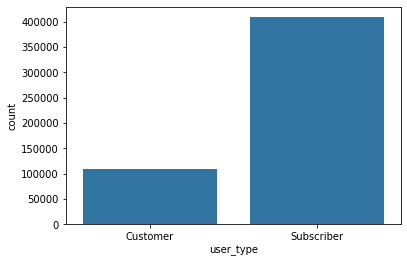

In [14]:
# Checking count of users in each type
sb.countplot(data = df, x = 'user_type', color = sb.color_palette()[0]);

> So the number of subscribers is almost 4 times the number of normal customers

> Next, I want to check the number of rides in each month of the year

In [15]:
df['month'] = pd.DatetimeIndex(df['start_time']).month # Define new column which extracts the month from the timestamp of the start time
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hour,month
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,154,2.56,12


In [16]:
# Map the month (represented in int) to month (represented in String)
months = {1:"January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
          7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"} 

df["month"] = df["month"].map(months) 

In [17]:
df.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June'], dtype=object)

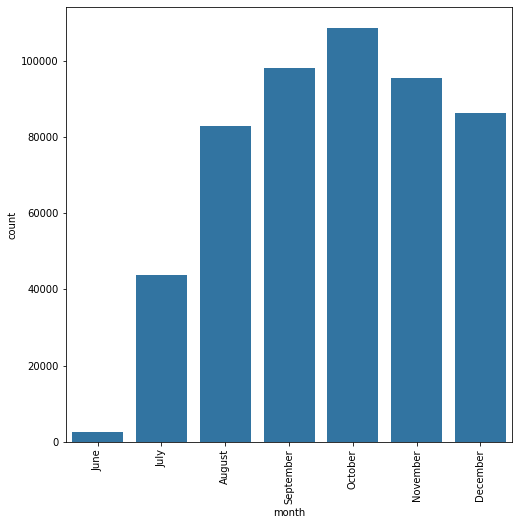

In [18]:
ordered_months = ['June', 'July', "August", "September", "October", 'November', 'December'] # List of months in the dataset (but in correct order)
months_order = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_months) # Defining an ordered categorical data type for the month column
df['month'] = df['month'].astype(months_order) # Set the month's data type to be the same as the the defined data type
plt.figure(figsize = (8, 8));
sb.countplot(data = df, x = 'month', color = sb.color_palette()[0]); # Plotting bar chart for the month column
plt.xticks(rotation = 90); # Rotate labels on x-axis to be more readable

> So the data only shows rides from june till the end of the year. Most of the rides are taken towards the end of the year (starting from August primarily)

> Finally, I want to calculate the distance between the geo-coordinates and see the distribution of the distances covered in the rides

> geopy library takes the latitude and longitude of each of the start and end destinations and returns the distance in kilometres 

> The next cell requires installing the package first and executing it took a couple of minutes

In [20]:
!pip install geopy

In [22]:
from geopy import distance

# Defining new column, distance (in kilometers), which is a result of a function that takes  
# latitude and longitude of 2 geo coordinates and calculates the result as distance in kilometers

# The function is predefined in the geopy library

df['distance'] = df.apply(lambda row: distance.distance((row['start_station_latitude'], row['start_station_longitude']),
                                   (row['end_station_latitude'], row['end_station_longitude'])).km, axis=1)

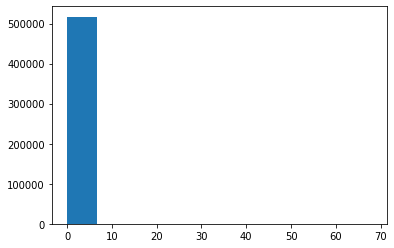

In [23]:
# Plotting distribution of the distances covered in the rides
plt.hist(data = df, x = 'distance');

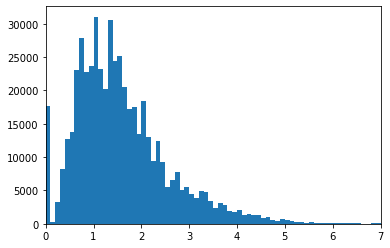

In [24]:
# Changing the bins to 0.1 to better see groupings of distance
bins = np.arange(0, df.distance.max()+0.1, 0.1)
plt.hist(data = df, x = 'distance', bins = bins);
plt.xlim([0,7]); # Since distances covered is till 7 kilometers, we limit the x-axis till that number

> Nothing really surprising in the distribution other than the presence of a number of 0 distance values. Let's check why those occur

In [38]:
df[df['distance'] == 0].head(10) # Checking rows where the distance is 0 kilometers

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hour,month,distance
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,154,2.56,December,0.0
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,75,1.25,December,0.0
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,72,1.20,December,0.0
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,69,1.15,December,0.0
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,71,1.18,December,0.0
49,782,2017-12-31 23:15:25.7580,2017-12-31 23:28:28.3720,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1691,Customer,13,0.22,December,0.0
50,799,2017-12-31 23:15:08.3850,2017-12-31 23:28:28.2040,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,533,Customer,13,0.22,December,0.0
51,575,2017-12-31 23:17:57.8670,2017-12-31 23:27:32.8800,6,The Embarcadero at Sansome St,37.804770,-122.403234,6,The Embarcadero at Sansome St,37.804770,-122.403234,1568,Customer,10,0.16,December,0.0
61,2659,2017-12-31 22:23:06.1720,2017-12-31 23:07:25.7570,230,14th St at Mandela Pkwy,37.810743,-122.291415,230,14th St at Mandela Pkwy,37.810743,-122.291415,2335,Customer,44,0.74,December,0.0
64,547,2017-12-31 22:52:35.8490,2017-12-31 23:01:43.1780,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2732,Subscriber,9,0.15,December,0.0


> So the reason for this 0 distance value is that the start & end stations are the same. So the rider probably took the bike to ride somewhere and return the bike to the station.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of the ride: In order to better see its distribution, I feature engineered a second column which was the duration in minutes. The distribution of this column was right skewed with most of the rides not exceeding 60 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the user types is that surprisingly the number of subscribers is almost 4 times the number of normal customers. No transformations were needed.

> I wanted to check if there were outliers in the duration of the rides so I feature engineerd a duration in hours column in order to check for these outliers. There were over 1500 rows that exceeded 6 hours of ride duration and the latitude and longitudes of the start and stations seemed also to be near each other. Since these outliers only made up about 0.44% of the data, they were removed from the dataframe.

> The presence of 0 distances in the feature engineered column (distance between 2 geo locations). But the reason for this 0 distance value was that the start & end stations were the same

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [25]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,duration_hour,month,distance
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,154,2.56,December,0.0
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,75,1.25,December,0.0


#### Duration, user type, month, distance

> First, let's investigate the average duration of the rides for each of the user types

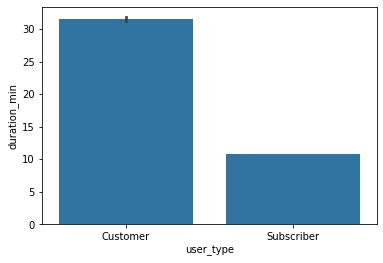

In [26]:
# Average of duration (in minutes) for each user type
sb.barplot(data = df, x = 'user_type', y = 'duration_min', color = sb.color_palette()[0]);

> So the average ride for customers is almost three times higher than the subscriber's. That could be because subscribers usually take rides more frequently than customers.

> Since we already know that the number of subscribers is much higher than customers, I didn't use the violinplot.

> Now let's look at the distances and durations covered in the rides in each month

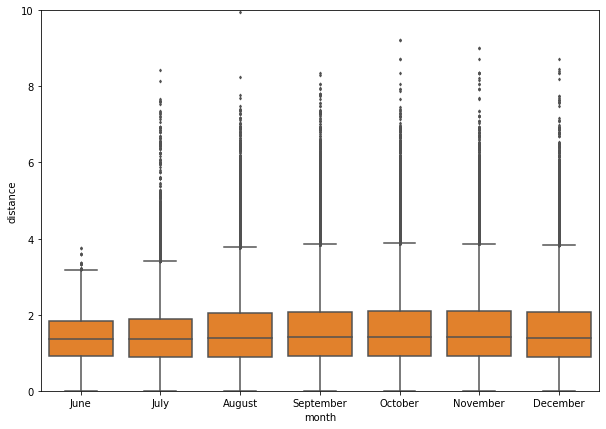

In [29]:
# Distribution of distances in each month
plt.figure(figsize = (10,7));
sb.boxplot(data = df, x = 'month', y = 'distance', color = sb.color_palette()[1], fliersize = 2);
plt.ylim([0, 10]);

> No difference really in the distances covered in each month

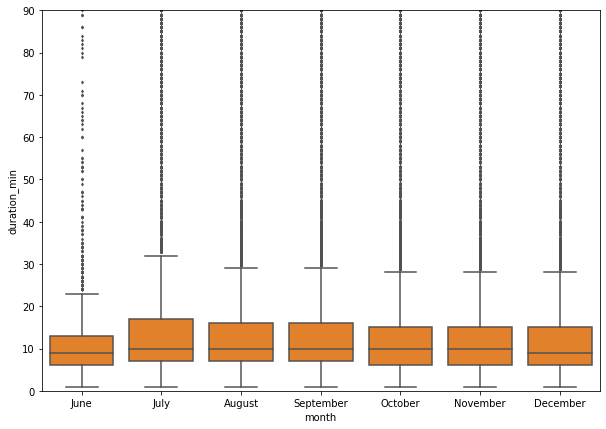

In [32]:
# Distribution of durations (in minutes) in each month
plt.figure(figsize = (10,7));
sb.boxplot(data = df, x = 'month', y = 'duration_min', color = sb.color_palette()[1], fliersize = 2); # Plotting boxplot wbere the y-axis is the duration (in minutes) and the x-axis is the months column, changing the fliersize to 2 to decrease the outlier points' size
plt.ylim([0, 90]); # Limiting the outliers number 

> Also no difference really in the durations covered in each month

> Finally, let's see the number of rides in each month per user

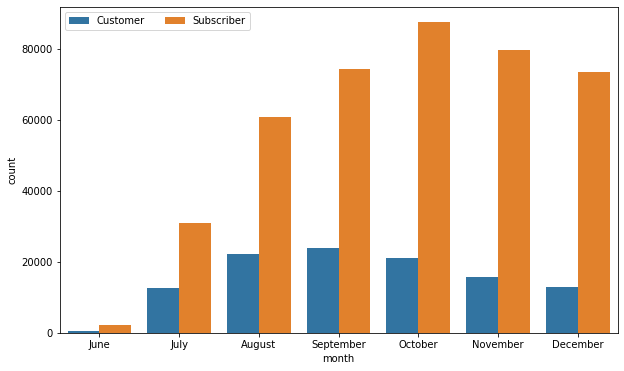

In [59]:
plt.figure(figsize = (10,6))
ax = sb.countplot(data = df, x = 'month', hue = 'user_type'); 
ax.legend(loc = 0, ncol = 2); # loc = 0 (means best positions) & ncol = 2 (number of values in the column = 2)

> So the frequency of both user types are almost the same when talking about when the rides are taken. The only difference is that customers take rides in September the most while subscribers take in October the most.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The features used to observe relationships between were duration (feature of interest), user type, distance and month of the ride (other features).

> A relationship between user type and duration was plotted. Surprising, the average ride for customers is almost three times higher than the subscriber's. That could be because subscribers usually take rides more frequently than customers. 

> The relationship between duration and the month of the ride was plotted but it showed nothing significant as almost every month had the same distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I also saw the number of rides in each month for every user. The frequency of both user types were almost the same when talking about when the rides are taken. The only difference is that customers take rides in September the most while subscribers take in October the most.

> The relationship between the distance and the month of the ride was plotted but it showed nothing significant as almost every month had the same distribution.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


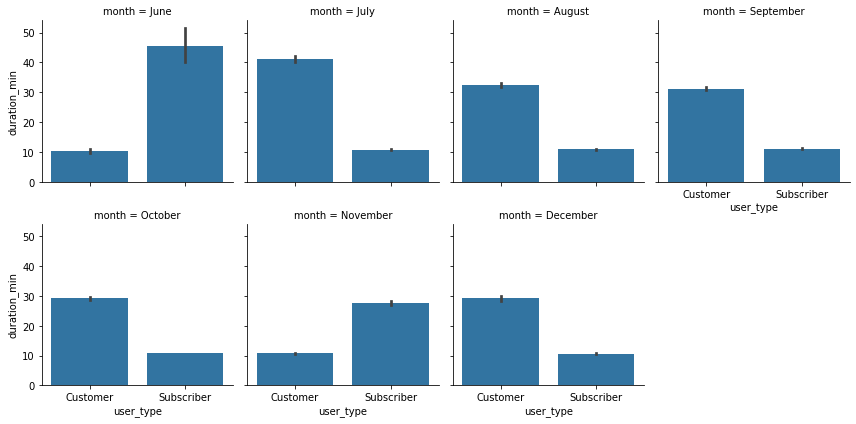

In [37]:
# Plotting the dataframe on multiple levels (levels of the month) where the plot itself will be a barplot. X-axis is user type and y-axis is average of duration (in minutes)
g = sb.FacetGrid(data = df, col = 'month', size = 3, col_wrap = 4); # Size = 3 to increase the graph size and col_wrap = 4 means plot every 4 graphs beside each other
g.map(sb.barplot, 'user_type', 'duration_min', color = sb.color_palette()[0]);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I made a visualization showing the duration of rides taken by each user type per month. Earlier, we had seen that the average duration of the normal customer is almost 3 times that of the subscriber. Now when I saw that relation each month, the average duration of the subscriber was surprising more than that of the customer in June and November. So this changes the idea that the customer always spends more time on the bike than the subscriber.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!